In [1]:
import pandas as pd
import numpy as np

In [2]:
## importing the datasets and storing them in a single dataframe
df = pd.read_csv('assessments1.csv', "|")
for i in range(2,5):
    df.append(pd.read_csv(f'assessments{i}.csv', "|"))

# Part 1: Analysis

# Q2. Most important analysis for the product-owner

In [3]:
## getting a general idea of the dataset
df.describe()

,session_id,grade,item_position,item_score,time_in_seconds
count,238666.000000,238666.000000,238666.000000,231938.000000,238666.000000
mean,107657.876296,3.421283,4.723417,0.725155,219.854437
std,62094.573529,1.418937,3.347635,0.453309,3339.455412
min,2.000000,0.000000,1.000000,-1.000000,-69044.000000
25%,53914.000000,2.000000,2.000000,0.000000,15.000000
50%,107732.000000,4.000000,4.000000,1.000000,40.000000
75%,161522.000000,4.000000,7.000000,1.000000,107.000000
max,215021.000000,7.000000,14.000000,1.000000,410739.000000


In [4]:
## analysis for the product owner--something is wrong, scores should either be 0 or 1
df[df.item_score<0]

,state_id,district_id,school_id,student_id,session_id,subject,grade,assessment_id,item_id,item_position,attempted,item_score,time_in_seconds,session_completed
35,KS,district_11,school_325,student_2394,33224,history,3,assessment_1763,item_1015,2,True,-1.0,6,2010-08-06 15:22:00
336,TX,district_5,school_51,student_775,130527,geography,2,assessment_1319,item_22066,1,True,-1.0,278,2010-01-22 16:21:00
542,ME,district_6,school_231,student_1584,152837,history,3,assessment_2249,item_5724,2,True,-1.0,2,2010-12-20 17:45:00
1040,CA,district_13,school_21,student_1278,203900,geography,1,assessment_4078,item_622,2,True,-1.0,11,2010-03-18 17:21:00
1282,KS,district_7,school_202,student_4005,110872,geography,4,assessment_3637,item_1414,4,True,-1.0,135,2010-05-17 19:07:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235874,TX,district_4,school_234,student_3712,134213,geography,3,assessment_4265,item_20459,5,True,-1.0,18,2011-03-04 18:51:00
236538,IL,district_0,school_27,student_1113,198069,history,3,assessment_1399,item_6460,3,True,-1.0,46,2010-11-19 17:17:00
236881,TX,district_4,school_234,student_4820,137971,geography,1,assessment_163,item_19121,5,True,-1.0,63,2011-02-14 18:50:00
237226,ME,district_6,school_214,student_985,113595,civics,2,assessment_639,item_17410,9,True,-1.0,31,2010-08-30 15:50:00


In [5]:
## analysis for the product owner--something is wrong, time (in secs) can never be negative
df[df.time_in_seconds<0]

,state_id,district_id,school_id,student_id,session_id,subject,grade,assessment_id,item_id,item_position,attempted,item_score,time_in_seconds,session_completed
206,KS,district_7,school_10,student_5259,110015,geography,4,assessment_1039,item_14564,7,True,1.0,-39,2010-10-12 22:38:00
723,CA,district_12,school_331,student_52,145434,geography,1,assessment_1299,item_21725,2,True,1.0,-50,2010-08-31 19:52:00
1005,CA,district_12,school_264,student_2061,109801,geography,5,assessment_3152,item_5404,4,True,0.0,-91,2010-10-28 21:05:00
1545,KS,district_7,school_323,student_2867,25811,geography,4,assessment_1699,item_3166,6,True,1.0,-68,2010-08-25 18:01:00
2059,TX,district_5,school_173,student_4937,149221,geography,4,assessment_3470,item_3225,4,True,1.0,-191,2011-03-18 19:41:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236230,CA,district_13,school_115,student_785,61901,geography,3,assessment_1709,item_2876,8,True,1.0,-7,2010-03-17 18:07:00
236317,TX,district_5,school_207,student_276,167932,geography,6,assessment_347,item_4608,3,True,1.0,-25,2011-02-01 22:36:00
236436,CA,district_12,school_97,student_39,108555,geography,6,assessment_1638,item_6595,1,True,1.0,-224,2010-09-09 13:35:00
237856,CA,district_12,school_97,student_3071,202939,geography,5,assessment_694,item_12331,5,True,1.0,-8,2011-02-18 20:41:00


In [6]:
def indicator(data):
    if (data.time_in_seconds<0) or (data.item_score<0):
        return True
    else: return False

df['error'] = df.apply(indicator, axis=1)

<AxesSubplot:ylabel='error'>

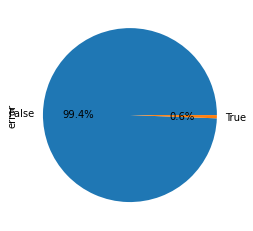

In [7]:
df.error.value_counts().plot(kind='pie', autopct="%1.1f%%")

In [8]:
df.error.value_counts()

False    237242
True       1424
Name: error, dtype: int64

## Analysis for the product owner
1. About 0.6% of the data is inaccurate/Assessment data for 1,400+ students affected
2. 700+ records with negative time (should always be positive)
3. 700+ records with negative score (should be either 0 or -1)

### Advice: Please check the data collection process/logic--it seems that the data is not being recorded accurately and about 0.6% records are affected by it

# Q1. Analysis for the CEO

In [9]:
## filtering out the required data and filling NA values with a boolean value denoting that the question was not attempted
df = df[(df.item_score>=0) & (df.time_in_seconds>=0)]
df['attempted'].fillna(False, inplace=True)
df

,state_id,district_id,school_id,student_id,session_id,subject,grade,assessment_id,item_id,item_position,attempted,item_score,time_in_seconds,session_completed,error
0,CA,district_12,school_201,student_5158,171976,geography,2,assessment_4445,item_15593,13,False,0.0,444,2010-01-28 02:29:00,False
1,ME,district_6,school_37,student_4966,193727,civics,3,assessment_204,item_15894,5,True,0.0,153,2011-04-26 21:01:00,False
2,KS,district_7,school_202,student_32,85914,geography,4,assessment_59,item_21309,14,True,1.0,7,2010-08-26 02:46:00,False
3,ME,district_6,school_194,student_4081,164257,civics,3,assessment_4639,item_13393,4,True,0.0,94,2010-03-02 19:17:00,False
4,KS,district_7,school_202,student_2284,180350,geography,4,assessment_424,item_15468,4,True,1.0,52,2010-01-29 21:17:00,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238661,CA,district_14,school_322,student_1302,166791,civics,3,assessment_2124,item_6623,1,True,0.0,2,2011-02-18 21:02:00,False
238662,IL,district_10,school_274,student_3003,3724,geography,4,assessment_3593,item_16054,9,True,1.0,7,2011-03-25 15:14:00,False
238663,CA,district_13,school_265,student_1727,36562,geography,1,assessment_566,item_18256,5,True,1.0,7,2010-04-27 14:51:00,False
238664,KS,district_7,school_323,student_3652,10685,geography,4,assessment_1542,item_16190,11,True,1.0,37,2011-02-01 18:39:00,False


In [10]:
print(f'We are currently active in {len(df.district_id.unique())} districts and {len(df.school_id.unique())} schools')

We are currently active in 15 districts and 331 schools


In [11]:
## printing values for total number of unique students and assessments
print(len(set(df.school_id) | set(df.student_id)), len(df.assessment_id.unique()))

5638 4423


In [12]:
## filtering the required colummns to work on--prepping for data summarization for further analysis
## NOTE: item_id is summarized as count--denoting the total count of questions in an assessment session
working = df[['school_id', 'student_id', 'assessment_id', 'grade', 'item_id', 'item_score']]
wp = working.pivot_table(index=['assessment_id'], values=['item_id', 'item_score'], aggfunc={'item_id':'count', 'item_score':'sum'})

In [13]:
## computing required columns
wp.reset_index(inplace=True)
wp['percentage'] = wp.item_score/wp.item_id

In [14]:
wp.sort_values('percentage')

,assessment_id,item_id,item_score,percentage
1092,assessment_2060,18,0.0,0.0
4070,assessment_654,13,0.0,0.0
352,assessment_1336,3,0.0,0.0
3070,assessment_3989,4,0.0,0.0
3078,assessment_3996,5,0.0,0.0
...,...,...,...,...
3232,assessment_4145,16,16.0,1.0
1202,assessment_2165,1,1.0,1.0
1204,assessment_2167,9,9.0,1.0
3271,assessment_4185,8,8.0,1.0


In [15]:
## bucketing the data in terms of percentage
wp['category'] = np.where(wp.percentage>=0.5, 'Above 50%', 'Below 50%')
wp

,assessment_id,item_id,item_score,percentage,category
0,assessment_0,85,71.0,0.835294,Above 50%
1,assessment_1,3,2.0,0.666667,Above 50%
2,assessment_10,264,226.0,0.856061,Above 50%
3,assessment_100,65,53.0,0.815385,Above 50%
4,assessment_1000,447,409.0,0.914989,Above 50%
...,...,...,...,...,...
4418,assessment_994,20,15.0,0.750000,Above 50%
4419,assessment_995,7,5.0,0.714286,Above 50%
4420,assessment_996,69,65.0,0.942029,Above 50%
4421,assessment_997,1,1.0,1.000000,Above 50%


Text(0.5, 1.0, 'Percentage of assessments with less than 50% scores')

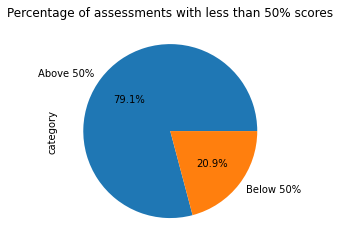

In [16]:
## plotting a pie-chart
pie = wp.category.value_counts().plot(kind='pie', autopct="%1.1f%%")
pie.set_title('Percentage of assessments with less than 50% scores')

## Analysis for the CEO
* We are active in 15 districts, 300+ schools (with 5600+ active students)
* On an average, a student participated in 0.78 assessments
* Students scored 50% or higher in about 80% of the assessments--denoting that the difficulty is leaning towards the 'easy' side of the spectrum

### Advice: Need to work on engagement--the minimum criteria is to have an engagement value of 1 (#students = #assessments); plan for students not participating. Difficulty needs to be adjusted, seems to be a little easy for students since about 80% of the assessment results are 50% or higher--probably time to implement competitive/adaptive logic to adapt to individual student's learning requirement.

In [17]:
df[(df.assessment_id=='assessment_634') & (df.student_id=='student_3212')]

,state_id,district_id,school_id,student_id,session_id,subject,grade,assessment_id,item_id,item_position,attempted,item_score,time_in_seconds,session_completed,error
4096,CA,district_8,school_88,student_3212,162809,civics,4,assessment_634,item_17956,2,True,0.0,320,2010-11-29 16:55:00,False
150642,CA,district_8,school_88,student_3212,162809,civics,4,assessment_634,item_22639,5,True,0.0,19,2010-11-29 16:55:00,False


In [18]:
len(df.student_id.unique())

5307

# Q3. Analysis for the educational researcher

In [19]:
student_comp = df.pivot_table(index=['school_id', 'student_id', 'assessment_id'], values=['item_id', 'attempted', 'item_score', 'time_in_seconds'],
                aggfunc={'item_id':'count', 'attempted':'sum', 'item_score':'sum', 'time_in_seconds':'sum'}).reset_index()

In [20]:
## filtering data for records with attempted questions
student_comp = student_comp[student_comp.attempted>0]
student_comp

,school_id,student_id,assessment_id,attempted,item_id,item_score,time_in_seconds
0,school_0,student_1145,assessment_2056,1,1,0.0,23
1,school_0,student_1145,assessment_253,1,1,0.0,62
2,school_0,student_1145,assessment_4123,1,1,0.0,36
3,school_0,student_1145,assessment_554,1,1,0.0,17
4,school_0,student_1145,assessment_956,2,2,0.0,286
...,...,...,...,...,...,...,...
117652,school_99,student_824,assessment_4138,1,1,0.0,4
117653,school_99,student_824,assessment_4385,1,1,0.0,195
117654,school_99,student_824,assessment_552,2,2,0.0,4
117655,school_99,student_889,assessment_1280,1,1,0.0,80


In [21]:
## computing required columns
student_comp['percentage'] = student_comp['item_score']/student_comp['item_id']
student_comp['attempt_percent'] = student_comp['attempted']/student_comp['item_id']
student_comp['average_time_pq'] = student_comp['time_in_seconds']/student_comp['item_id']
student_comp.sort_values(['percentage', 'attempt_percent', 'time_in_seconds'], ascending=[False, False, True], inplace=True)

In [22]:
student_comp[student_comp.time_in_seconds>=0].describe()

,attempted,item_id,item_score,time_in_seconds,percentage,attempt_percent,average_time_pq
count,116917.000000,116917.000000,116917.000000,116917.000000,116917.000000,116917.000000,116917.000000
mean,1.945979,1.965180,1.436198,425.415295,0.671744,0.993583,198.964379
std,1.307952,1.323226,1.446242,5446.041267,0.446369,0.050547,2699.625105
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.200000,0.000000
25%,1.000000,1.000000,0.000000,26.000000,0.000000,1.000000,19.000000
50%,1.000000,1.000000,1.000000,74.000000,1.000000,1.000000,45.000000
75%,2.000000,3.000000,2.000000,209.000000,1.000000,1.000000,108.000000
max,16.000000,16.000000,16.000000,649335.000000,1.000000,1.000000,319950.000000


In [23]:
student_comp[(student_comp['time_in_seconds']>0) & (student_comp['attempt_percent']>0.99)].describe()

,attempted,item_id,item_score,time_in_seconds,percentage,attempt_percent,average_time_pq
count,114709.000000,114709.000000,114709.000000,114709.000000,114709.000000,114709.0,114709.000000
mean,1.937860,1.937860,1.411755,399.385523,0.669793,1.0,193.048892
std,1.300873,1.300873,1.425468,4660.785882,0.447697,0.0,2559.209645
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.0,0.333333
25%,1.000000,1.000000,0.000000,26.000000,0.000000,1.0,19.000000
50%,1.000000,1.000000,1.000000,72.000000,1.000000,1.0,44.800000
75%,2.000000,2.000000,2.000000,204.000000,1.000000,1.0,107.000000
max,16.000000,16.000000,16.000000,649335.000000,1.000000,1.0,319950.000000


In [24]:
## binning the data in terms of grade (categorized on the basis of percentage score)
## NOTE: Here grade is not the grade in which the student is, instead, it represents the category of the percentage
student_comp.loc[student_comp['percentage'].between(0, 0.25, 'both'), 'grade'] = 'D'
student_comp.loc[student_comp['percentage'].between(0.25, 0.5, 'right'), 'grade'] = 'C'
student_comp.loc[student_comp['percentage'].between(0.5, 0.75, 'right'), 'grade'] = 'B'
student_comp.loc[student_comp['percentage'].between(0.75, 1, 'right'), 'grade'] = 'A'

In [25]:
## computing median time spent per question for every student in a grade
student_comp[['grade', 'average_time_pq']].groupby('grade').median()

,average_time_pq
grade,
A,46.000000
B,61.500000
C,68.833333
D,39.000000


## Analysis for the educational researcher
* A grade-A student spends about 46 seconds (median) in attempting a question
* It can be seen that students who invest below 39 secs in attempting a question fare poorly
* A sweet-spot for the students could be investing about 45-60 seconds per question as per difficulty
* If students over-invest their time, they fare lower than expected (more of a deadlock situation); lower chances to answer the question correctly

In [26]:
student_comp = student_comp[student_comp.time_in_seconds>0]
student_comp[student_comp.grade=='A'].describe()

,attempted,item_id,item_score,time_in_seconds,percentage,attempt_percent,average_time_pq
count,74434.000000,74434.000000,74434.000000,74434.000000,74434.000000,74434.000000,74434.000000
mean,2.087635,2.109036,2.075597,478.703361,0.992875,0.993125,209.859013
std,1.411091,1.427212,1.370404,5452.890437,0.039380,0.051660,2232.629326
min,1.000000,1.000000,1.000000,1.000000,0.750000,0.333333,0.333333
25%,1.000000,1.000000,1.000000,29.000000,1.000000,1.000000,19.000000
50%,2.000000,2.000000,2.000000,82.000000,1.000000,1.000000,46.333333
75%,3.000000,3.000000,3.000000,241.000000,1.000000,1.000000,115.500000
max,16.000000,16.000000,16.000000,649335.000000,1.000000,1.000000,254444.000000


In [27]:
student_comp[student_comp.grade=='B'].describe()

,attempted,item_id,item_score,time_in_seconds,percentage,attempt_percent,average_time_pq
count,7285.000000,7285.000000,7285.000000,7285.000000,7285.000000,7285.000000,7285.000000
mean,2.705422,2.744955,1.580920,813.104461,0.561359,0.985830,291.216868
std,1.114149,1.112194,0.777352,8980.959441,0.079305,0.075813,3445.565460
min,1.000000,2.000000,1.000000,1.000000,0.500000,0.200000,0.333333
25%,2.000000,2.000000,1.000000,68.000000,0.500000,1.000000,27.666667
50%,2.000000,2.000000,1.000000,161.000000,0.500000,1.000000,61.500000
75%,3.000000,3.000000,2.000000,373.000000,0.666667,1.000000,140.000000
max,15.000000,15.000000,11.000000,410839.000000,0.733333,1.000000,205419.500000


In [28]:
df_geog = df[df.subject=='geography']
df_hcvs = df[(df.subject=='history') | (df.subject=='civics')]

In [29]:
df_geog

,state_id,district_id,school_id,student_id,session_id,subject,grade,assessment_id,item_id,item_position,attempted,item_score,time_in_seconds,session_completed,error
0,CA,district_12,school_201,student_5158,171976,geography,2,assessment_4445,item_15593,13,False,0.0,444,2010-01-28 02:29:00,False
2,KS,district_7,school_202,student_32,85914,geography,4,assessment_59,item_21309,14,True,1.0,7,2010-08-26 02:46:00,False
4,KS,district_7,school_202,student_2284,180350,geography,4,assessment_424,item_15468,4,True,1.0,52,2010-01-29 21:17:00,False
5,KS,district_7,school_10,student_1642,143188,geography,5,assessment_1936,item_2167,4,True,1.0,25,2010-09-02 18:53:00,False
6,TX,district_5,school_173,student_2040,162722,geography,4,assessment_3887,item_15726,7,True,1.0,7,2011-01-07 20:10:00,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238660,CA,district_12,school_190,student_2517,4160,geography,2,assessment_3115,item_457,1,True,1.0,26,2010-04-23 14:34:00,False
238662,IL,district_10,school_274,student_3003,3724,geography,4,assessment_3593,item_16054,9,True,1.0,7,2011-03-25 15:14:00,False
238663,CA,district_13,school_265,student_1727,36562,geography,1,assessment_566,item_18256,5,True,1.0,7,2010-04-27 14:51:00,False
238664,KS,district_7,school_323,student_3652,10685,geography,4,assessment_1542,item_16190,11,True,1.0,37,2011-02-01 18:39:00,False


In [30]:
df.describe()

,session_id,grade,item_position,item_score,time_in_seconds
count,230538.000000,230538.000000,230538.000000,230538.000000,230538.000000
mean,107706.767574,3.449253,4.723716,0.730435,216.455717
std,62097.176344,1.423192,3.354476,0.443735,3330.135698
min,2.000000,0.000000,1.000000,0.000000,0.000000
25%,53949.000000,2.000000,2.000000,0.000000,15.000000
50%,107800.500000,4.000000,4.000000,1.000000,38.000000
75%,161587.000000,5.000000,7.000000,1.000000,101.000000
max,215021.000000,7.000000,14.000000,1.000000,410739.000000


# Part 2: Hypothesis Testing
"The head of Learning Sciences has asked you to present evidence to show that performance
on assessments is related to time spent taking the assessment."

## Interpretation
The head of Learning Sciences has an assumption that the total time invested in an assessment is correlated to the grade/score of a student. A simple hypothesis testing will be sufficient to prove if there is any such evidence.
Thus, we need to prove if there is any statistical evidence in favour/against of this statement.

From the interpretation we can conclude that <b><i>our null hypothesis (H0), in this case, would be that the mean time spent of a grade A student would be equal to the mean time spent of a grade D student</i></b>.

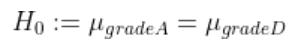

and consequently, <b><i>our alternate hypothesis (H1) would be that the mean time spent by a grade A student would unequal to the mean time spent by the grade D student in an assessment</i></b>.

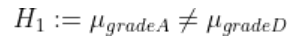

## Step 1: Data extraction

We have already cleaned the required data in part one Q3. analysis for educational researcher, where we looked into the average time spent by a student, per question.
We shall take the same data, and split it into two datasets, grade_A and grade_D

In [31]:
grade_D = student_comp[student_comp.grade=='D']
grade_D.describe()

,attempted,item_id,item_score,time_in_seconds,percentage,attempt_percent,average_time_pq
count,33689.000000,33689.000000,33689.000000,33689.000000,33689.000000,33689.000000,33689.00000
mean,1.401437,1.409896,0.003948,217.010538,0.000702,0.996618,156.46455
std,0.795472,0.804780,0.065939,4410.586786,0.011507,0.038851,3418.02333
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.333333,0.50000
25%,1.000000,1.000000,0.000000,20.000000,0.000000,1.000000,17.00000
50%,1.000000,1.000000,0.000000,49.000000,0.000000,1.000000,39.00000
75%,2.000000,2.000000,0.000000,119.000000,0.000000,1.000000,87.00000
max,13.000000,13.000000,3.000000,508174.000000,0.230769,1.000000,319950.00000


A sample of 9000 records is then extracted from each dataset, to perform this hypothesis test. Sampling is done to remove some bias in the inherent ordering of the data and helps nullify any statistical correlation caused due to such instances.

In [32]:
## sampling students from two categories to perform an unpaired t-test
grade_A = student_comp[student_comp.grade=='A'].sample(9000)
grade_D = student_comp[student_comp.grade=='D'].sample(9000)

## Step 2: Performing the test

Since in this situation, we do not know the standard deviation of the population--we only have a sampled dataset at hand, we would have to perform a t-test. Moreover, we would have to perform an unpaired t-test since the samples are taken from two different groups of people participating in the assessment. 

ASSUMPTIONS:
* The sampled datasets would be IID (independent and identical datasets)
* They would have the same standard deviation
* Both the datasets would be normally distributed (or of size 30 or higher)

Lastly, due to our hypothesis formulation, it is clear that <b>we have to perform a two-tailed test considering the level of significance (alpha) for this test to be 0.05 (5% error is acceptable)</b>.

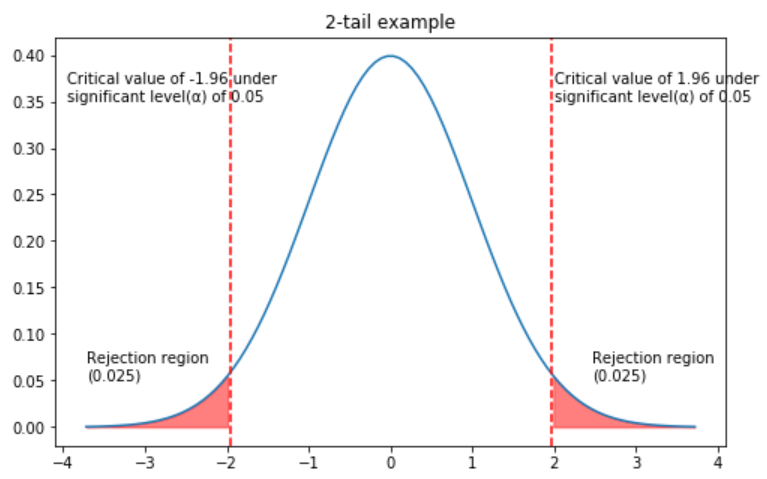

We proceed ahead assuming our sampled datasets satisfy all the requirements mentioned above.

In [33]:
## importing the required packages and performing the t-test
import scipy.stats as stats
ttest,p_value = stats.ttest_ind(grade_A['time_in_seconds'],grade_D['time_in_seconds'])

In [34]:
print(ttest, p_value)

3.7005600084795964 0.00021576519285477903


Results during testing:
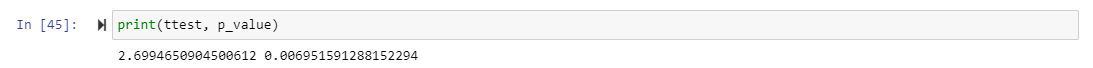

## Observation
The test-statistic in this case (t-stat) = 2.70 and the p-value = 0.007
### Since p-value is << alpha (level of significance), we have statistical evidence to reject the null hypothesis (H0)

p-value is a probabilistic value denoting the probability of the test mirroring our null hypothesis, it ranges from 0 to 1 and as p-value approaches towards 1, the probability of our null hypothesis being true increases.

## Conclusion

In [35]:
if p_value<0.05:
    print("Reject null hypothesis (H0)")
else: print("Fail to reject null hypothesis (H0)")
    

Reject null hypothesis (H0)


Considering the p-value and level of signicance during testing, we have enough statistical evidence to reject the null hypothesis, we conclude that at the significance level of 0.05, there is correlation of time spent in an assessment and the performance of the student.

### The mean time spent by a grade A student and a grade D student in an assessment would not be equal; and thus, performance on assessments is related to time spent taking the assessment.

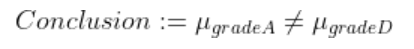

NOTE:
if the p-value was greater than or equal to alpha, we would conclude that there is not enough evidence to reject the null hypothesis and thereby, mean time spent by a grade A and a grade D student could be equal.

In [36]:
grade_A

,school_id,student_id,assessment_id,attempted,item_id,item_score,time_in_seconds,percentage,attempt_percent,average_time_pq,grade
88687,school_323,student_2896,assessment_3934,2,2,2.0,182,1.0,1.0,91.00,A
83103,school_315,student_455,assessment_3046,2,2,2.0,35,1.0,1.0,17.50,A
13302,school_140,student_2391,assessment_2601,2,2,2.0,25,1.0,1.0,12.50,A
29062,school_190,student_2517,assessment_1463,1,1,1.0,516,1.0,1.0,516.00,A
30811,school_196,student_4115,assessment_2397,1,1,1.0,114,1.0,1.0,114.00,A
...,...,...,...,...,...,...,...,...,...,...,...
26135,school_182,student_3312,assessment_93,1,1,1.0,273,1.0,1.0,273.00,A
52894,school_24,student_59,assessment_3309,2,2,2.0,45,1.0,1.0,22.50,A
103308,school_63,student_1582,assessment_407,4,4,4.0,269,1.0,1.0,67.25,A
88912,school_323,student_3357,assessment_3254,2,2,2.0,207,1.0,1.0,103.50,A


In [37]:
grade_D

,school_id,student_id,assessment_id,attempted,item_id,item_score,time_in_seconds,percentage,attempt_percent,average_time_pq,grade
72552,school_290,student_146,assessment_4560,1,1,0.0,32,0.0,1.0,32.000000,D
17806,school_158,student_1573,assessment_1392,1,1,0.0,13,0.0,1.0,13.000000,D
55976,school_251,student_1873,assessment_2220,1,1,0.0,14,0.0,1.0,14.000000,D
95329,school_37,student_1237,assessment_3429,1,1,0.0,2,0.0,1.0,2.000000,D
11974,school_134,student_2570,assessment_296,1,1,0.0,52,0.0,1.0,52.000000,D
...,...,...,...,...,...,...,...,...,...,...,...
54499,school_244,student_3987,assessment_194,2,2,0.0,276,0.0,1.0,138.000000,D
40738,school_210,student_1961,assessment_2729,2,2,0.0,8,0.0,1.0,4.000000,D
62958,school_267,student_1824,assessment_2124,1,1,0.0,4,0.0,1.0,4.000000,D
24692,school_176,student_1803,assessment_2205,1,1,0.0,16,0.0,1.0,16.000000,D
